# Overview
This notebook implements high-dimensional embedding-based visualizations for PSO particle movement over time. 

# Imports

In [2]:
import numpy as np
import phate
import scprep
from matplotlib import pyplot as plt

In [12]:
data = np.load("100_constrained_rastrigin_Penalty.npy")
positions = data["positions"]
velocities = data["velocities"]
scores = data["scores"]

In [13]:
(T, n, N, K) = positions.shape
reshaped_positions = np.reshape(positions, (T * n, N * K))
time = np.repeat(np.arange(T), n)

In [14]:
phate_op = phate.PHATE()
Y_phate = phate_op.fit_transform(reshaped_positions)

Calculating PHATE...
  Running PHATE on 20100 observations and 10000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 14.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 43.26 seconds.
    Calculating affinities...


/home/scientist/miniconda3/lib/python3.12/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 100 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/home/scientist/miniconda3/lib/python3.12/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


    Calculated affinities in 25.60 seconds.
  Calculated graph and diffusion operator in 84.13 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 19.55 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.17 seconds.
  Calculated landmark operator in 30.30 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 5.27 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.52 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.35 seconds.
Calculated PHATE in 125.59 seconds.


/home/scientist/miniconda3/lib/python3.12/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/scientist/miniconda3/lib/python3.12/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


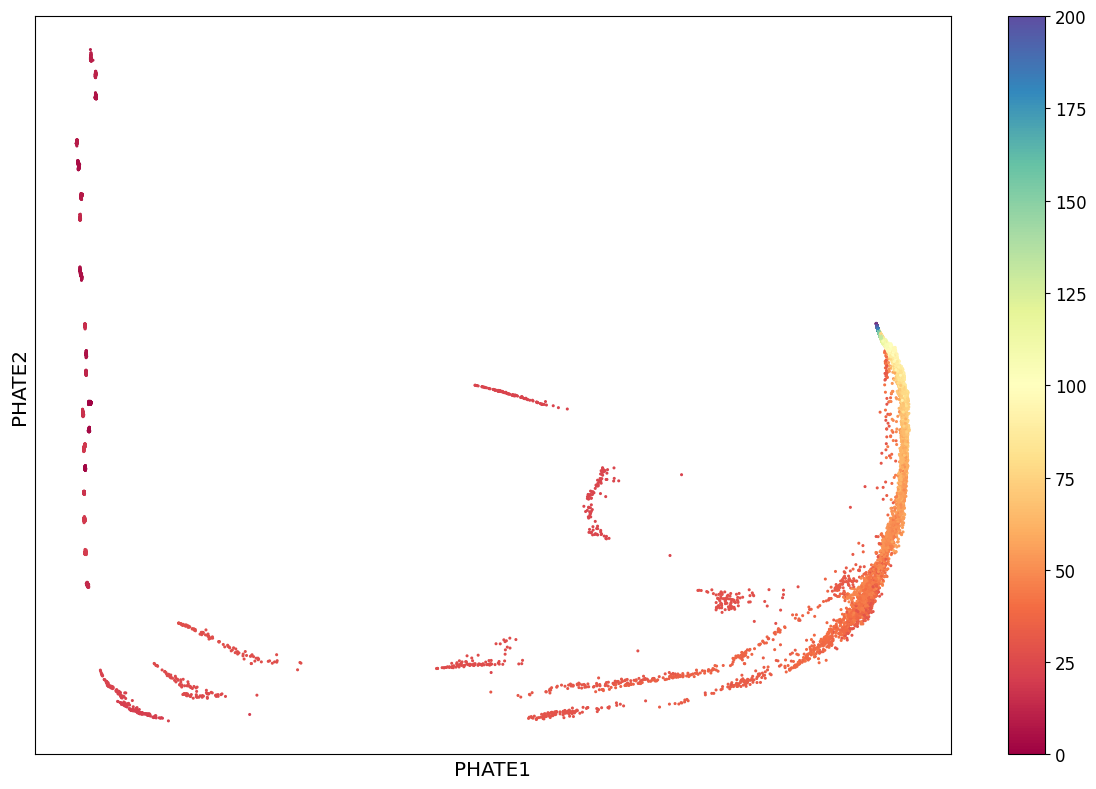

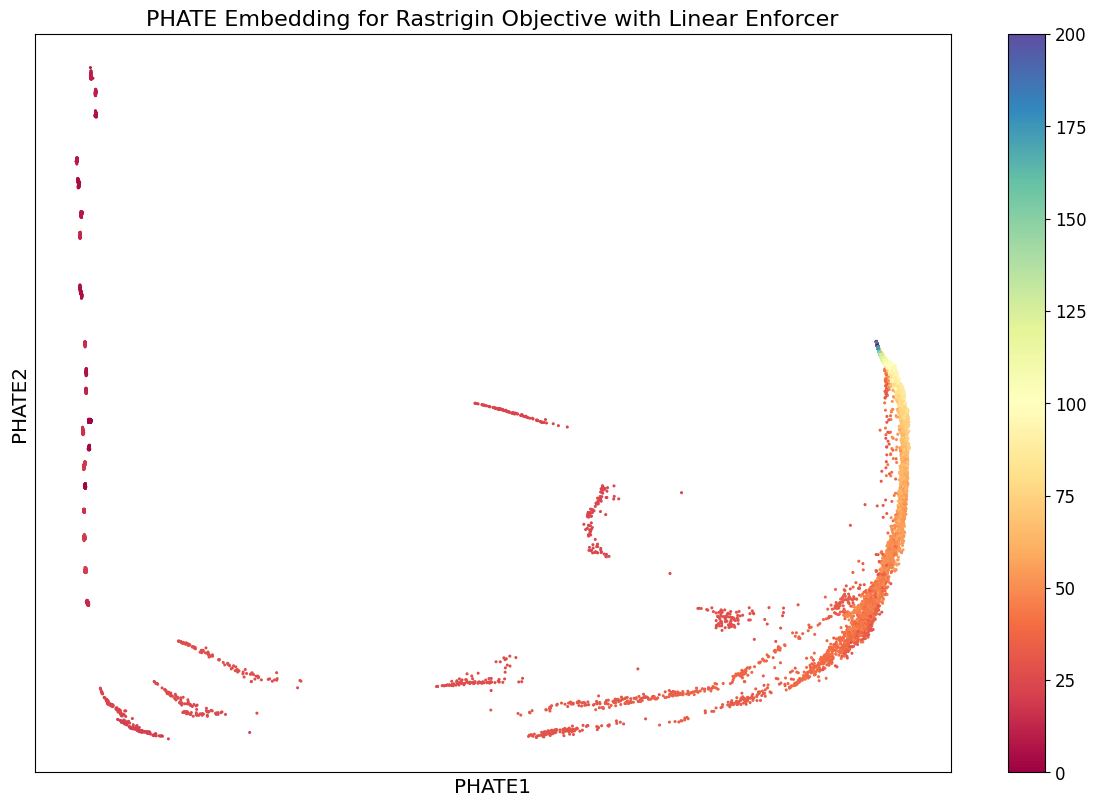

In [15]:
scprep.plot.scatter2d(Y_phate, figsize=(12,8), c=time, cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

scprep.plot.scatter2d(Y_phate, figsize=(12, 8), c=time, cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

plt.title("PHATE Embedding for Rastrigin Objective with Linear Enforcer", fontsize=16)
plt.savefig("PHATE_rastrigin_linear.png", bbox_inches='tight')